# Green Screen editor

* Objective is to replace the green background of and image with a desired background.

# Resources

Importing the necessary libraries for making the green-screen editor.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np 
import cv2

%matplotlib inline

## Getting the image

Importing the images using matplot and keeping them as variables

In [2]:
#Getting the main image (with green screend).
img = mpimg.imread(r".\Images\car.jpg")

#Gettinf the back ground image that you want to replace the green screen with.
back_ground = mpimg.imread(r".\Images\backGround.jpg")

Image dimension: (480, 852, 3)
Background dimensions: (465, 700, 3)


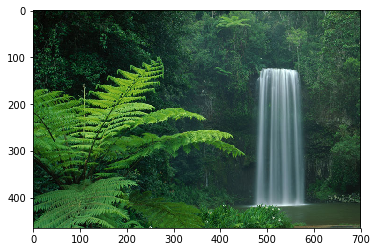

In [3]:
#Getting the image's dimensions
print('Image dimension:',img.shape)
print('Background dimensions:',back_ground.shape)

#Display the image 
#plt.imshow(image)

plt.imshow(back_ground)

Width: 852 
Height: 480


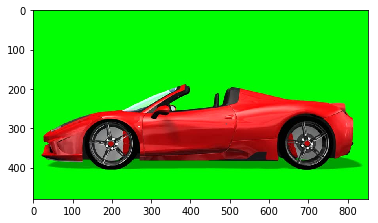

In [4]:
plt.imshow(img)

width = img.shape[1]
height = img.shape[0]

print('Width:',width,"\nHeight:",height)

## Data optimization

Fixing a few details of the data like size and angle. 

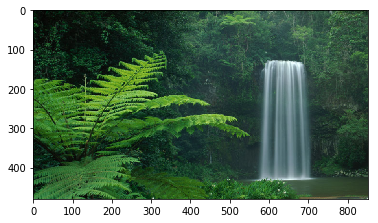

In [23]:
img_fixed = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
img_fixed = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
background_resized = cv2.resize(back_ground, (img_fixed.shape[1], img_fixed.shape[0]))

plt.imshow(background_resized)

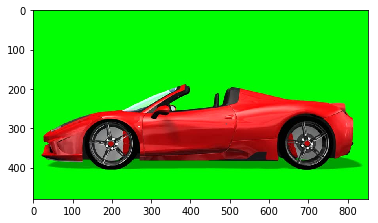

In [24]:
plt.imshow(img_fixed)

In [25]:
img = img_fixed

## Color Marking

* Create a green color threshold

In [26]:
#define color boundaries/treshold (lower and upper limits)
lower_green = np.array([0,100,0])
upper_green = np.array([100, 255, 130])

## Create the mask
The idea of using a mask is to be able to differentiate between the green background and the foreground that wants to be kept. This way we can know what we should eliminate or not.

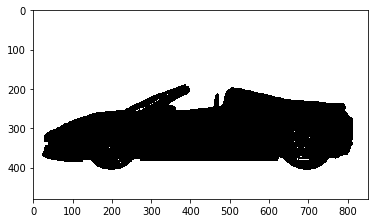

In [27]:
#define the mask area
mask = cv2.inRange(img,lower_green, upper_green)

#Vizualize the mask
plt.imshow(mask,cmap='gray')

## Now that we have our mask we can use it to masl the main image

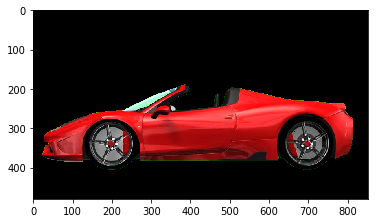

In [28]:
#Mask the image to let the desired part be kept
masked_image = np.copy(img)

masked_image[mask != 0] = [0,0,0]

plt.imshow(masked_image)

## Merging both images

1. Copy background
2. Apply the mask to the background
3. Display the images to make sure it works
4. Add images together

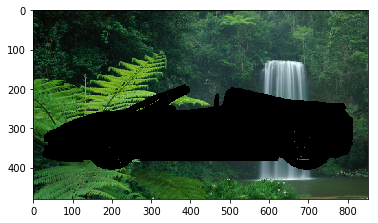

In [29]:
#Make a copy of the resized backgroun image 
bgr_img = background_resized.copy()

bgr_img[mask == 0] = [0,0,0]

plt.imshow(bgr_img)

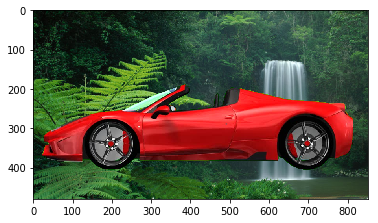

In [30]:
final_image = bgr_img + masked_image

plt.imshow(final_image)

## Full model

Here is the full method organized

In [13]:
def greenScreen(image,backgroundImage,alignment):
    """
    Will detect and change the "Green Screen" backgroun
    to a desired background image.
    :param str image: The original image with green screen
    :param str backgroundImage: The background image that will replace the green screen
    :param str alignment: The orientation of the image. (horizontal or vertical) 
    
    """
   
    #Making sure both images are Vertical
    if alignment == "horizontal":
        if(image.shape[0] > image.shape[1]):
            image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    if alignment == "vertical":
        if(image.shape[0] < image.shape[1]):
            image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

    
    # resize the image
    backgrounImage_Resized = cv2.resize(backgroundImage, (image.shape[1], image.shape[0]))
                
   #define color boundaries/treshold (lower and upper limits)
    lower_green = np.array([0,100,0])
    upper_green = np.array([100, 255, 130]) 
    
    #Setting up the rainge of green we are gonna change
    mask = cv2.inRange(image,lower_green, upper_green)

    #Copy of image that is going to have the mask
    masked_image = np.copy(image)
    
    #Turn black everything that is white on the mask
    masked_image[mask != 0] = [0,0,0]

    bgr_img = backgrounImage_Resized.copy()
    
    #Set everythign that is black on the mask, as black on the background image
    bgr_img[mask == 0] = [0,0,0]
    
    #Merge both images
    final_image = bgr_img + masked_image
    
    #Show the final picture
    plt.imshow(final_image)
    

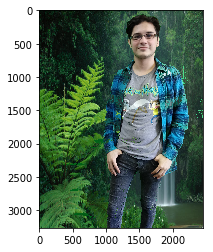

In [14]:
backgroundImage = mpimg.imread(r".\Images\backGround.jpg")
image = mpimg.imread(r".\Images\Me1.jpg")

greenScreen(image = image ,backgroundImage = backgroundImage, alignment = 'vertical')

In [15]:
image_datas = [r".\Images\Me1.jpg",
            r".\Images\Me2.jpg",
            r".\Images\Nayda1.jpg",
            r".\Images\TA1.jpg",
              r".\Images\car.jpg"]

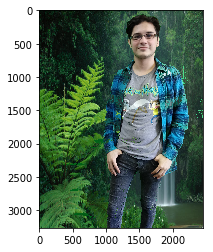

In [16]:
greenScreen(image = mpimg.imread(image_datas[0]),backgroundImage = backgroundImage, alignment = 'vertical')

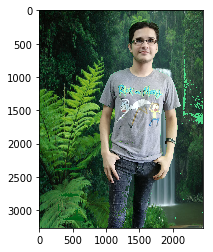

In [17]:
greenScreen(image = mpimg.imread(image_datas[1]),backgroundImage = backgroundImage, alignment = 'vertical')

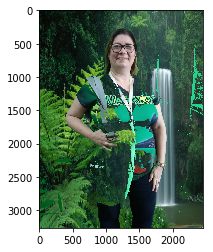

In [18]:
greenScreen(image = mpimg.imread(image_datas[2]),backgroundImage = backgroundImage, alignment = 'vertical')

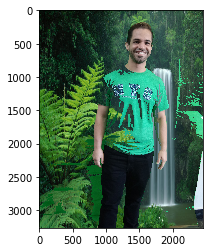

In [19]:
greenScreen(image = mpimg.imread(image_datas[3]),backgroundImage = backgroundImage, alignment = 'vertical')

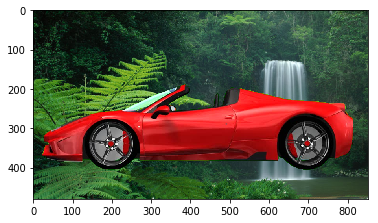

In [20]:
greenScreen(image = mpimg.imread(image_datas[4]),backgroundImage = backgroundImage,alignment = 'horizontal')